# **Assignment**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

# **Importing the modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# **Loading the dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_data.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Here we are getting two columns with int values and one column with object type values

# **Preprocessing the data**

In [4]:
# removes pattern in the input text
def remove_pattern(input_text,pattern):
  r = re.findall(pattern,input_text)
  for word in r:
    input_text = re.sub(word,  "", input_text)
  return input_text

In [5]:
# remove twitter handles (@user)
df["clean_tweet"] = np.vectorize(remove_pattern)(df["tweet"], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
# remove special characters, numbers and punctuations
df["clean_tweet"] = df["clean_tweet"].str.replace(r"[^a-zA-Z0-9]+", ' ')
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [7]:
# remove shortcuts
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause they offer wheelchair...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [8]:
# Tokenize 
tokenized_tweet = df["clean_tweet"].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cause, they, offer, whe...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [9]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, lyft, credit, caus, they, offer, wheel...
2                              [bihday, your, majesti]
3                      [model, love, take, with, time]
4                          [factsguid, societi, motiv]
Name: clean_tweet, dtype: object

In [10]:
# Combine the words into a sentence 
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df["clean_tweet"] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit caus they offer wheelchair v...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi motiv


# **Exploratory Data Analysis**

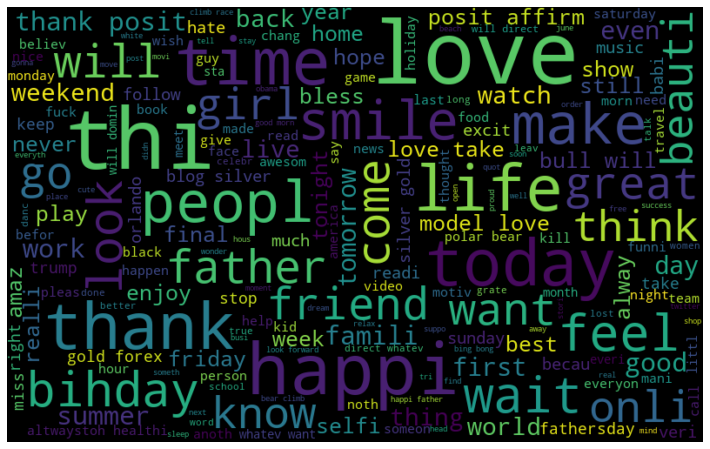

In [11]:
# visualize frequent words
all_words = " ".join([sentence for sentence in df["clean_tweet"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

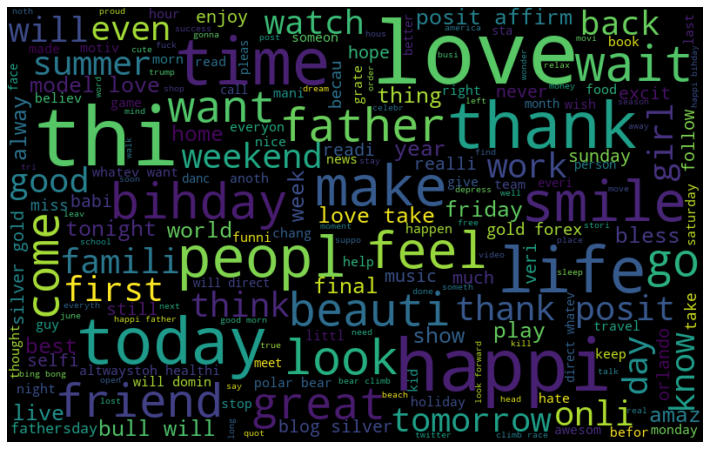

In [12]:
# Frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df["clean_tweet"][df["label"] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

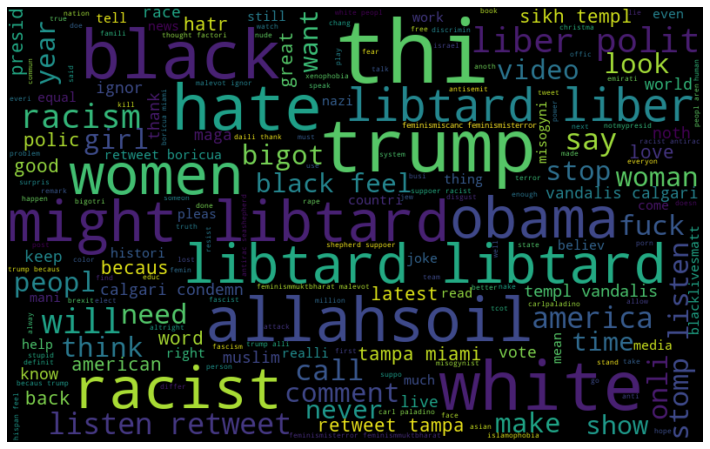

In [13]:
# Frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df["clean_tweet"][df["label"] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# extracting the hashtags
def hashtag_extract(tweets):
  hashtags = []
  # loop words in a tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags

In [18]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df["tweet"][df["label"]==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df["tweet"][df["label"]==1])

In [21]:
ht_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [22]:
#unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [23]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [24]:
#using a dict from nltk
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


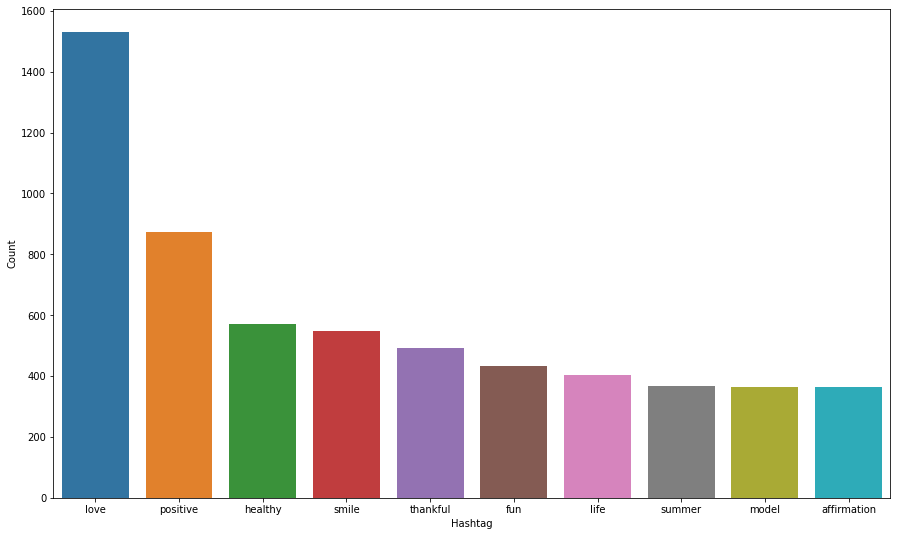

In [25]:
# select top 10 hashtags
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [27]:
freq_n = nltk.FreqDist(ht_negative)
d_n = pd.DataFrame({'Hashtag': list(freq_n.keys()),
                  'Count':list(freq_n.values())})
d_n.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


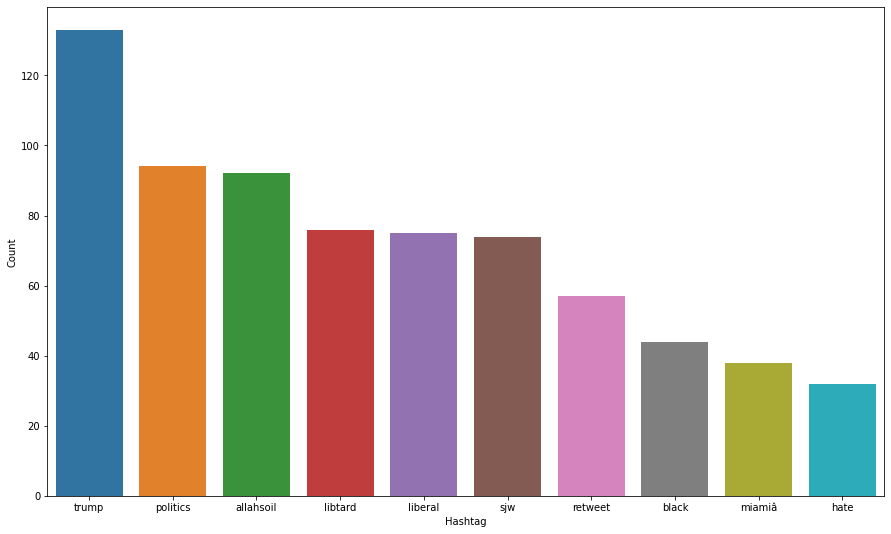

In [28]:
# select top 10 hashtags for negative
d_n = d_n.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d_n,x='Hashtag',y='Count')
plt.show()

# **Input Split**

In [29]:
# Feature extraction - Convert into BOW or Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform((df['clean_tweet']))

In [31]:
# bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# **Training the model**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [36]:
# training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
# testing
pred = model.predict(x_test)

In [40]:
f1_score(y_test,pred)

0.5181711606096132

In [42]:
accuracy_score(y_test,pred)

0.948567138030284

In [43]:
# use probability to get output 
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test,pred)

0.5689488910318226

In [44]:
accuracy_score(y_test,pred)

0.9440620698285571